# Angelica Porcelli - Validation datasets

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd

from modules import function


## Dataset A

In [3]:
dfa = pd.read_csv("./result/A_RESULT.csv")

In [4]:
function.mean_metrics(dfa)


## 1. Global Performance(Mean and Dev. Std)
                 Global Mean  Global Dev. Std
reliability           0.6675           0.2268
mean_bpm_f          128.9513          13.5248
mean_real_bpm_f     136.3536          14.6817
sir_gain_dB           8.9241           1.6271
fSNR_dB               8.1851           2.0838
SIR                  -3.9307           3.9619
SNR                  -8.4023           6.0698
SE                    0.6326           0.3538
PPV                   0.6878           0.3101
F1                    0.6548           0.3370
ACC                   0.5737           0.3630
TP                   82.6400          43.8091
FP                   31.4800          29.9139
FN                   52.9600          53.4895

--- Analysis 2: Group using isSuccess ---

## 2. Comparison between SUCCESS & FAIL
                reliability  mean_bpm_f  mean_real_bpm_f  sir_gain_dB  \
FAIL (False)         0.4339    124.5833         146.8435       8.6138   
SUCCESS (True)       0.8510    132.

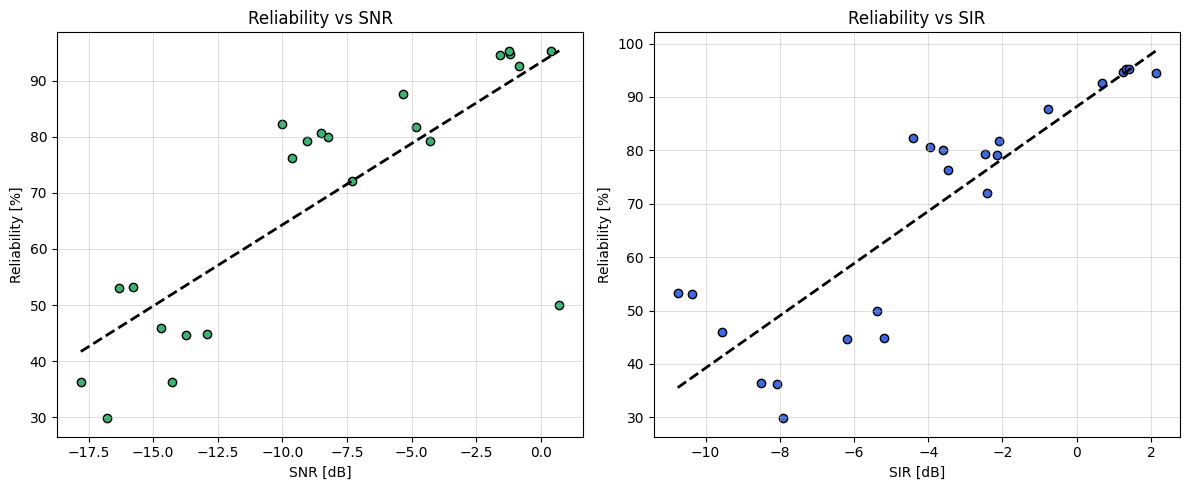

In [5]:
function.plot_reliability_vs_snr_sir(dfa)


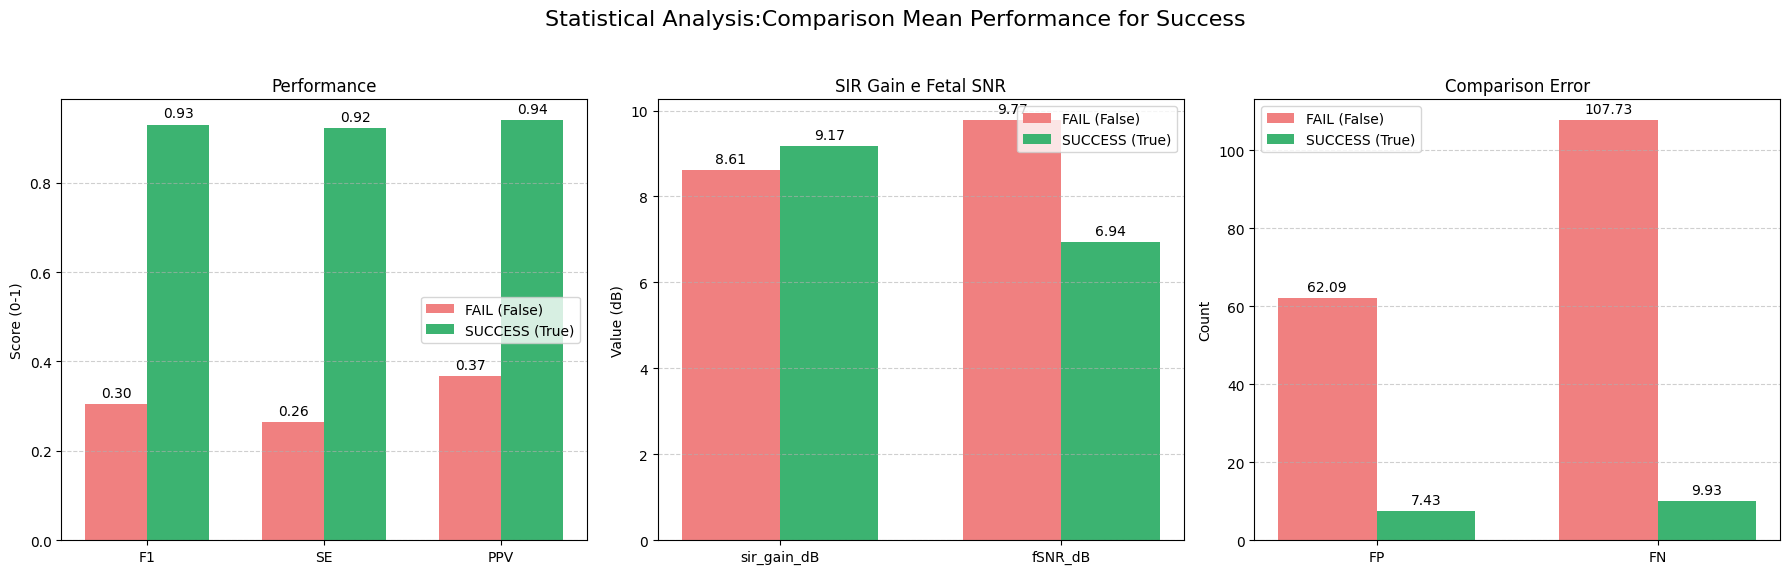

In [6]:
function.plot_success_vs_fail_metrics(dfa)

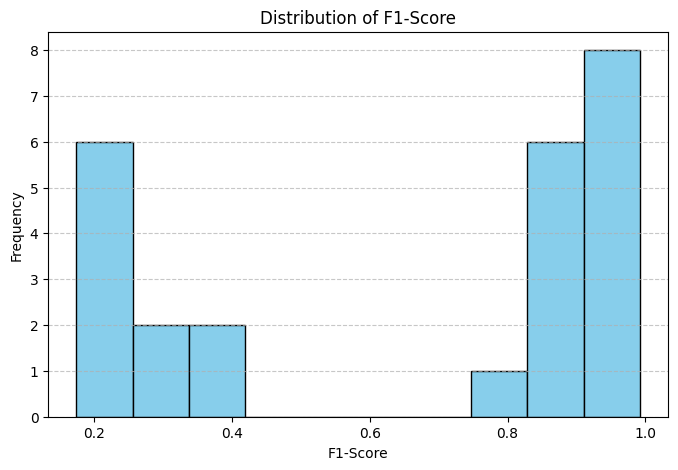

In [7]:
function.plot_distribution(dfa)    

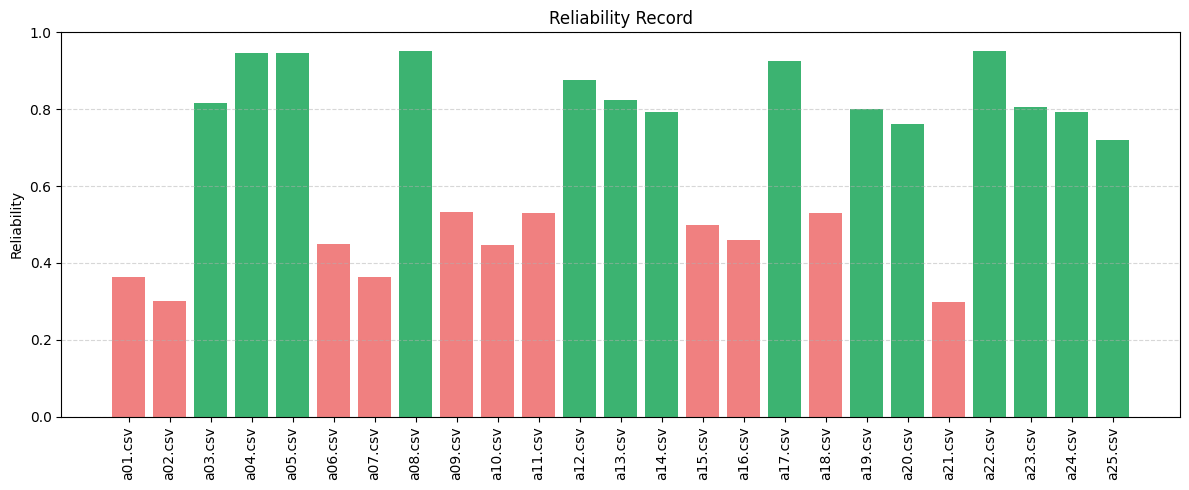

In [8]:
function.plot_reliability_all(dfa)

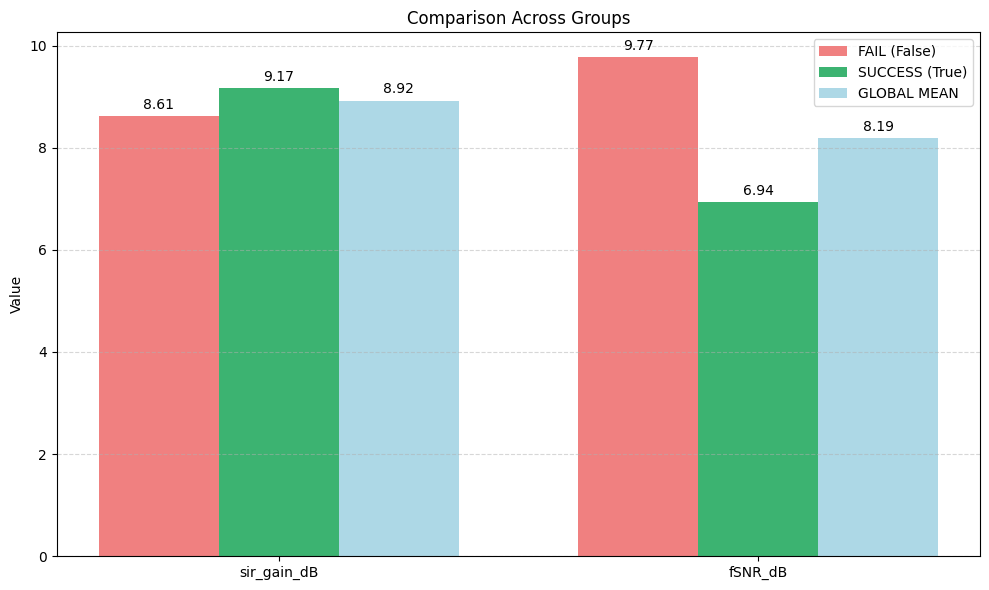

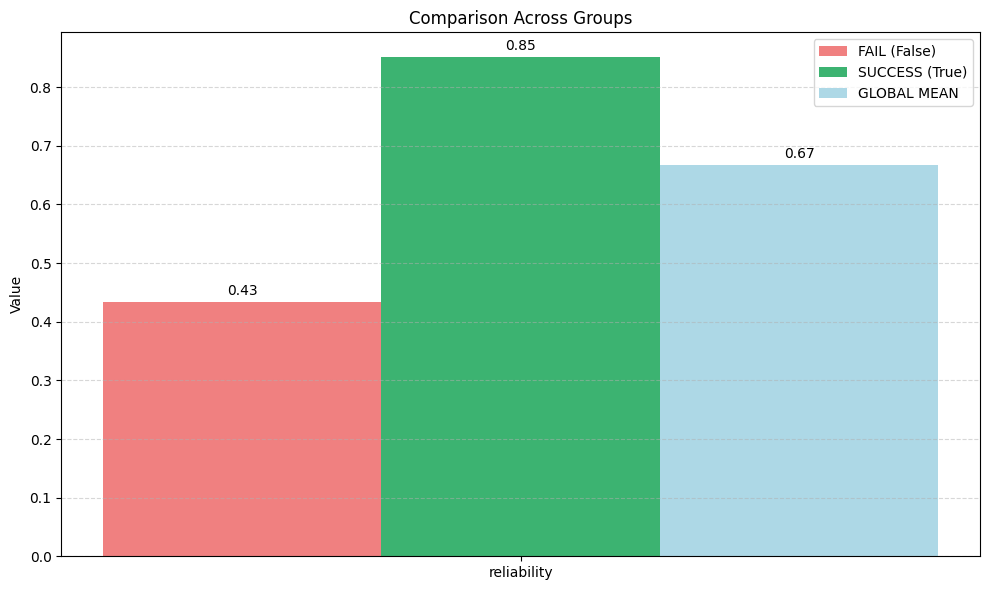

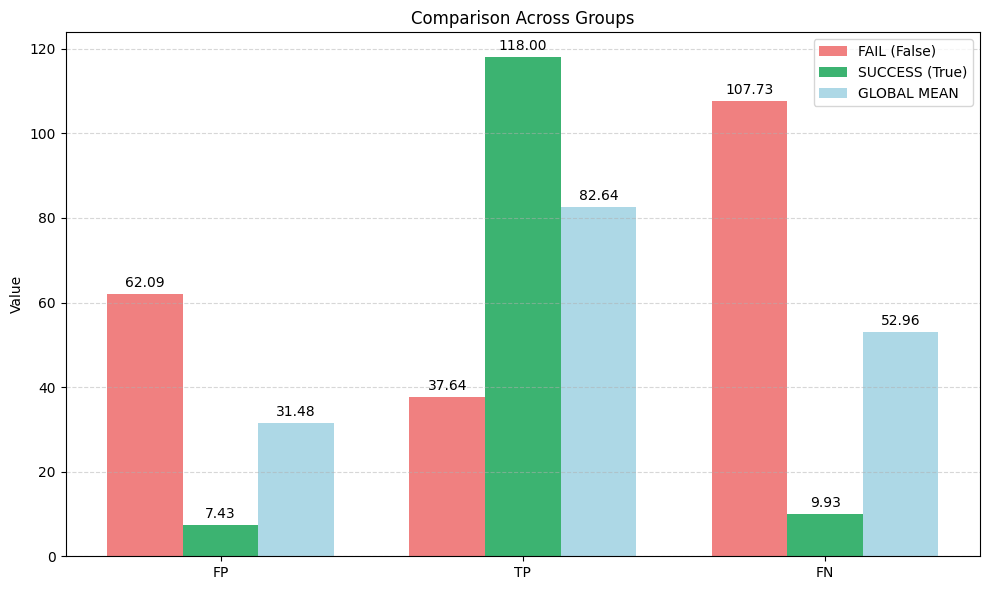

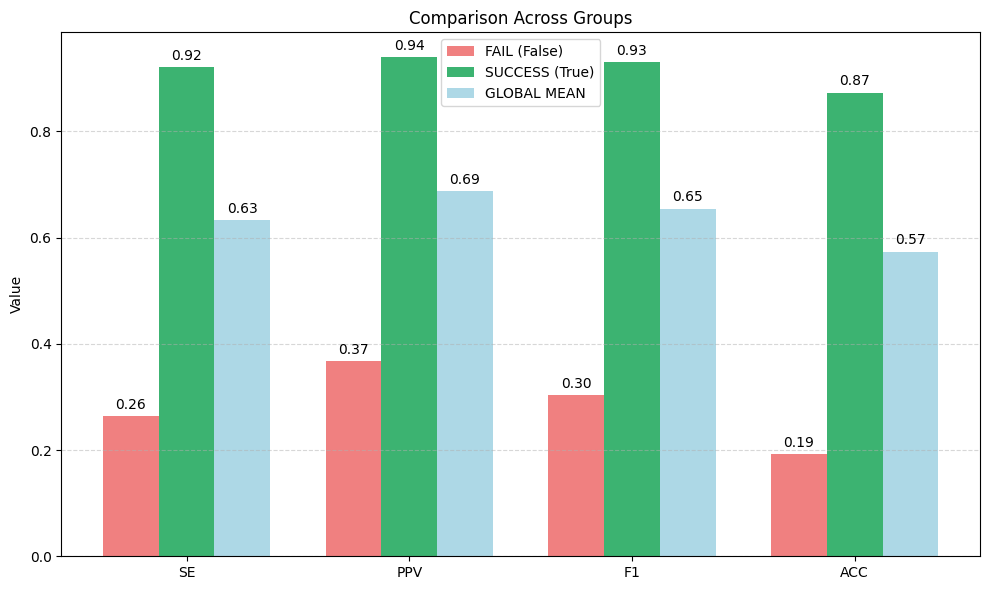

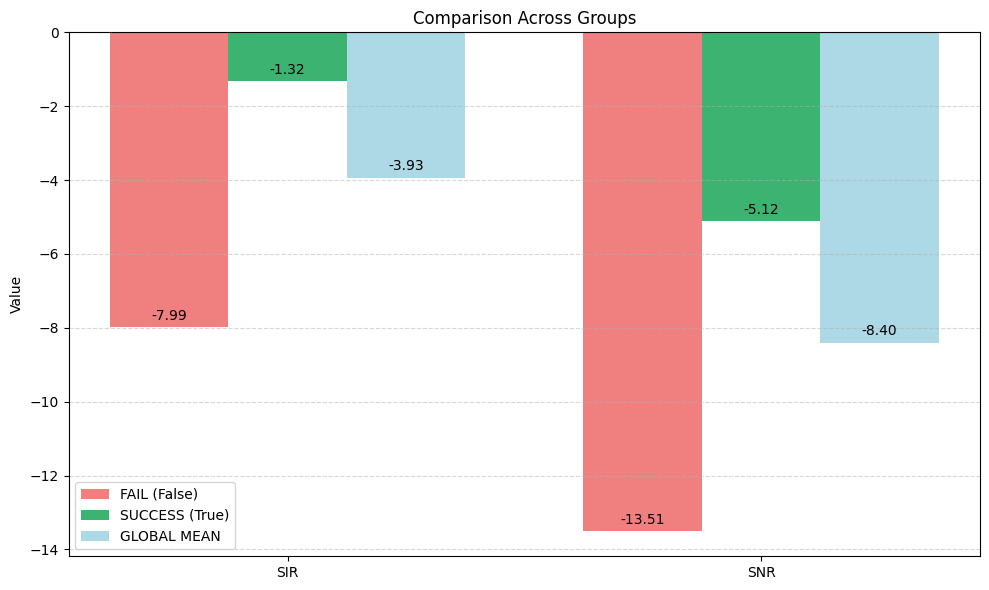

In [16]:
function.plot_all_metrics_groups(dfa, ['sir_gain_dB','fSNR_dB'])
function.plot_all_metrics_groups(dfa, ['reliability'])
function.plot_all_metrics_groups(dfa, ['FP','TP','FN'])
function.plot_all_metrics_groups(dfa, ['SE','PPV','F1','ACC'])
function.plot_all_metrics_groups(dfa, ['SIR','SNR'])

In [10]:
def convert_metrics_to_percentage(df):

    df = df.copy()
    
    df["Total_real"] = df["TP"] + df["FN"]

    df["Total_detected"] = df["TP"] + df["FP"]

    df["SE_%"]  = (df["TP"] / df["Total_real"] * 100).round(2)
    df["PPV_%"] = (df["TP"] / df["Total_detected"] * 100).round(2)
    df['ACC_%'] = (df['ACC']*100).round(2)
    df["TP_%"] = (df["TP"] / df["Total_real"] * 100).round(2)
    df["FN_%"] = (df["FN"] / df["Total_real"] * 100).round(2)
    df["FP_%"] = (df["FP"] / df["Total_detected"] * 100).round(2)
    df['F1_%'] = (df['F1']*100).round(2)
    return df

df_pct = convert_metrics_to_percentage(dfa)



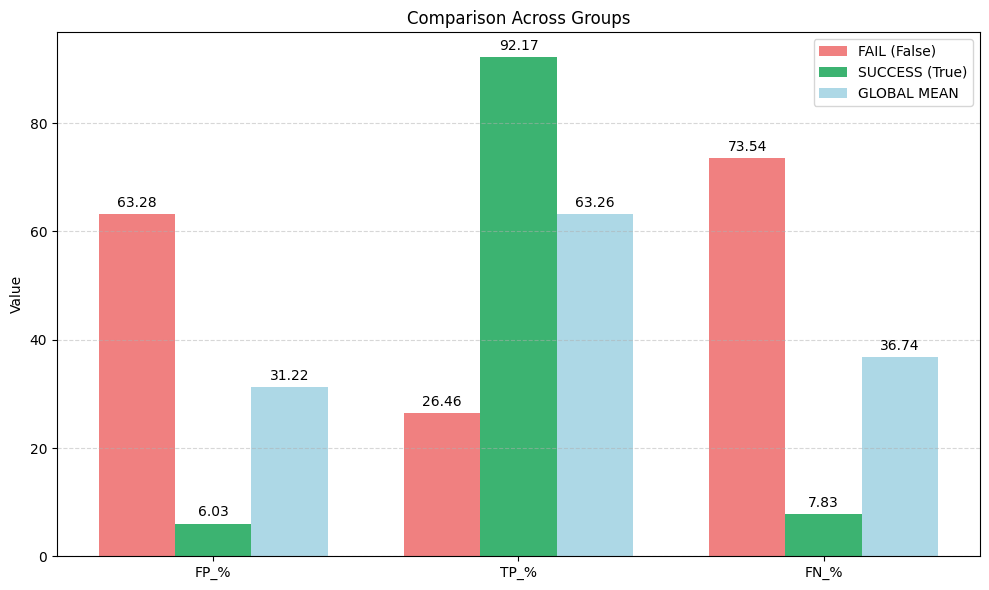

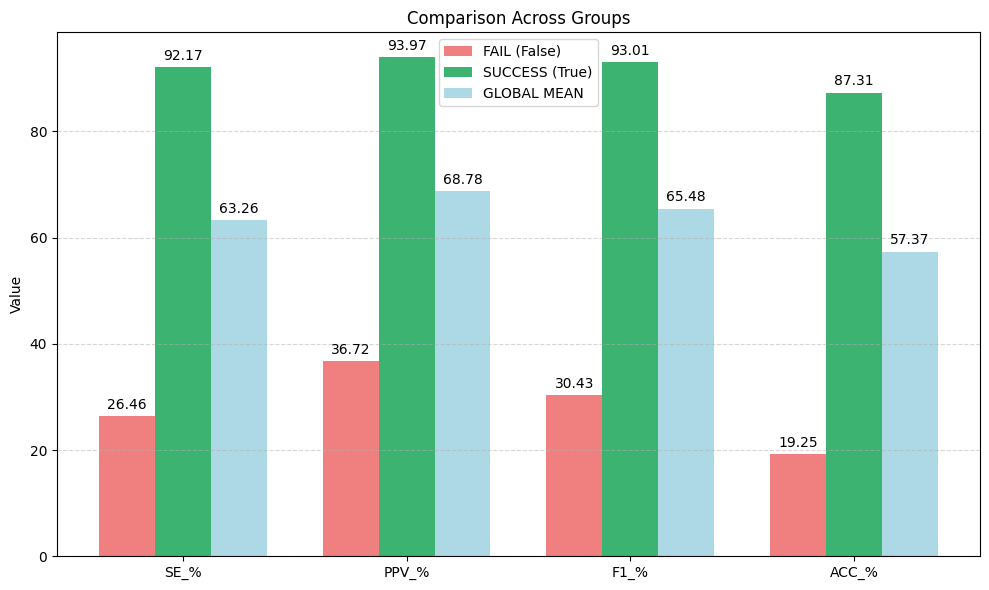

In [11]:
function.plot_all_metrics_groups(df_pct, ['FP_%','TP_%','FN_%', ])
function.plot_all_metrics_groups(df_pct, ['SE_%','PPV_%','F1_%','ACC_%'])